In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import os
import random

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import tensorflow as tf

In [14]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = '0'

# Load data
train_X = np.load('Feature_Sel_Sauvola_train_features.npy')
train_Y = np.load('Feature_Sel_Sauvola_train_labels.npy')
test_X = np.load('Feature_Sel_Sauvola_test_features.npy')
test_Y = np.load('Feature_Sel_Sauvola_test_labels.npy')

train_Y[train_Y=='benign'] = 0
train_Y[train_Y=='malignant'] = 1
train_Y = train_Y.astype(np.int32)

test_Y[test_Y=='benign'] = 0
test_Y[test_Y=='malignant'] = 1
test_Y = test_Y.astype(np.int32)

In [15]:
# Flatten the images for MLP
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

# normorlize the data
min_list1 = np.amin(train_X, axis=0)
max_list1 = np.amax(train_X, axis=0)
train_X = (train_X - min_list1) / (max_list1 - min_list1)

min_list2 = np.amin(test_X, axis=0)
max_list2 = np.amax(test_X, axis=0)
test_X = (test_X - min_list2) / (max_list2 - min_list1)

In [16]:
# Create the MLP model
model = Sequential()
model.add(Dense(256, input_dim=train_X.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [17]:
optimizer = Adam(0.0001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y, epochs=100, batch_size=128)

# Evaluate the model
print('\n# Evaluate on test data')
results = model.evaluate(test_X, test_Y, batch_size=128)
print('test loss, test acc:', results)

Epoch 1/100
28/28 [==============================] - 1s 32ms/step - loss: 0.9694 - accuracy: 0.5103
Epoch 2/100
28/28 [==============================] - 1s 32ms/step - loss: 0.7694 - accuracy: 0.5006
Epoch 3/100
28/28 [==============================] - 1s 31ms/step - loss: 0.7311 - accuracy: 0.5031
Epoch 4/100
28/28 [==============================] - 1s 32ms/step - loss: 0.7231 - accuracy: 0.5043
Epoch 5/100
28/28 [==============================] - 1s 33ms/step - loss: 0.7172 - accuracy: 0.5040
Epoch 6/100
28/28 [==============================] - 1s 32ms/step - loss: 0.7109 - accuracy: 0.5157
Epoch 7/100
28/28 [==============================] - 1s 32ms/step - loss: 0.7025 - accuracy: 0.5256
Epoch 8/100
28/28 [==============================] - 1s 32ms/step - loss: 0.7047 - accuracy: 0.5091
Epoch 9/100
28/28 [==============================] - 1s 32ms/step - loss: 0.7053 - accuracy: 0.5256
Epoch 10/100
28/28 [==============================] - 1s 32ms/step - loss: 0.6979 - accuracy: 0.5362

In [18]:
# Generate predictions
y_pred = model.predict(test_X)

y_pred = np.argmax(y_pred, axis=1)

76/76 [==============================] - 1s 6ms/step


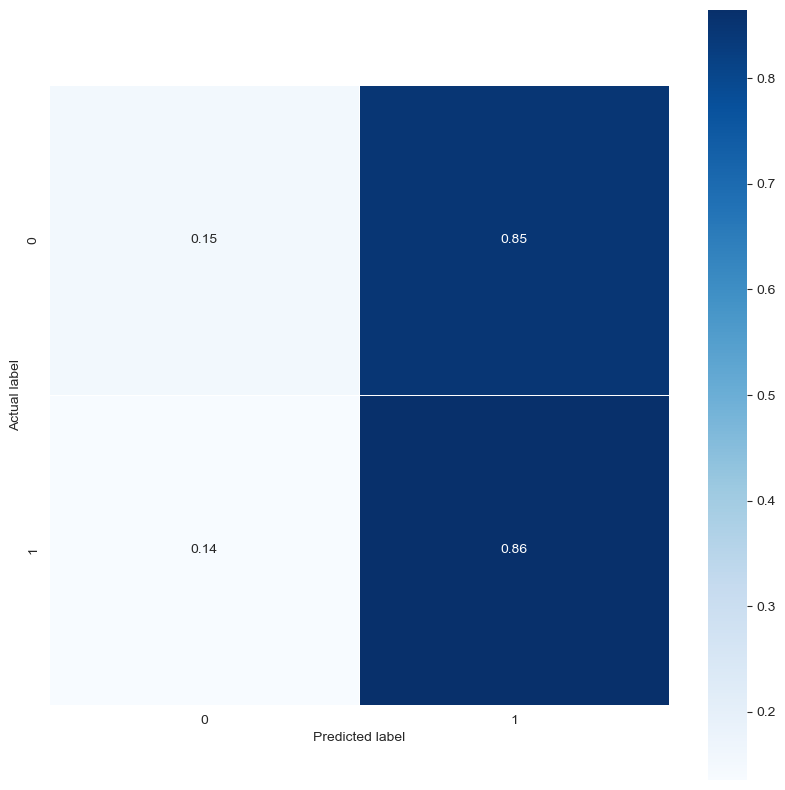

              precision    recall  f1-score   support

           B       0.33      0.15      0.21       724
           M       0.70      0.86      0.78      1679

    accuracy                           0.65      2403
   macro avg       0.52      0.51      0.49      2403
weighted avg       0.59      0.65      0.61      2403



In [19]:
cm = confusion_matrix(test_Y, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

report = classification_report(test_Y, y_pred, target_names=['B', 'M'])
print(report)